In [5]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Operações básicas:
def translate(A,x1,x2):
    rows,cols = A.shape
    new_img = A.copy()
    for i in range(rows):
        for j in range(cols):
            new_img[(i+x1)%rows,(j+x2)%cols] = A[i,j]
    return new_img

def dilation(a, b):
    """a é a imagem, b é o elemento estruturante"""
    width, height = a.shape
    struct_height, struct_width = b.shape
    pad_h = struct_height // 2
    pad_w = struct_width // 2
    padded_img = np.pad(a, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0) # Pad para evitar que saia da imagem
    new_img = np.zeros_like(a)
    
    for i in range(width):
        for j in range(height):
            region = padded_img[i:i + struct_height, j:j + struct_width]
            if np.any(region[b == 1] == 255):
                new_img[i, j] = 255
            else:
                new_img[i, j] = 0
    
    return new_img

def erosion(a, b):
    """a é a imagem, b é o elemento estruturante"""
    width, height = a.shape
    struct_height, struct_width = b.shape
    pad_h = struct_height // 2
    pad_w = struct_width // 2
    padded_img = np.pad(a, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0) # Pad para evitar que saia da imagem
    new_img = np.zeros_like(a)
    
    for i in range(width):
        for j in range(height):
            region = padded_img[i:i + struct_height, j:j + struct_width]
            if np.all(region[b == 1] == 255):
                new_img[i, j] = 255
            else:
                new_img[i, j] = 0
                
    return new_img

# mt bom
def circle_maker(radius):
    diameter = radius * 2 + 1
    center = radius
    structure = np.zeros((diameter, diameter), dtype=np.uint8)
    for i in range(diameter):
        for j in range(diameter):
            distance = np.sqrt((i - center) ** 2 + (j - center) ** 2)
            if distance <= radius:
                structure[i, j] = 1
    return structure

def opening(a, b):
    eroded_img = erosion(a, b)
    opened_img = dilation(eroded_img, b)
    return opened_img

def closing(a, b):
    dilated_img = dilation(a, b)
    closed_img = erosion(dilated_img, b)
    return closed_img

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


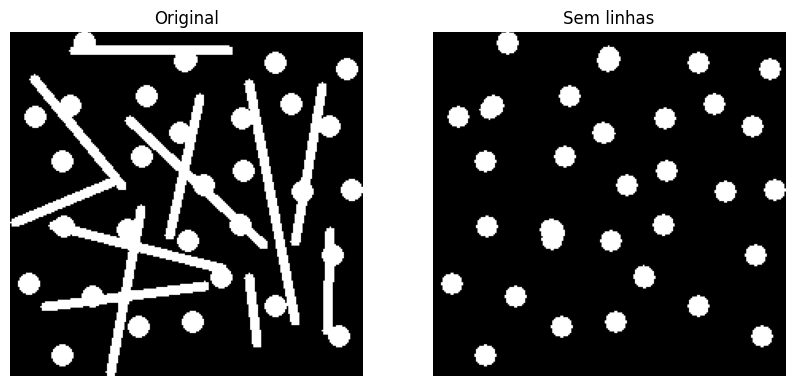

In [37]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

radius = 6
# Criando o elemento estruturante a partir do raio
structuring_element = circle_maker(radius)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(opening(img1, structuring_element), cmap='gray', vmin=0, vmax=255)
plt.title("Sem linhas")
plt.axis("off")

plt.show()

2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


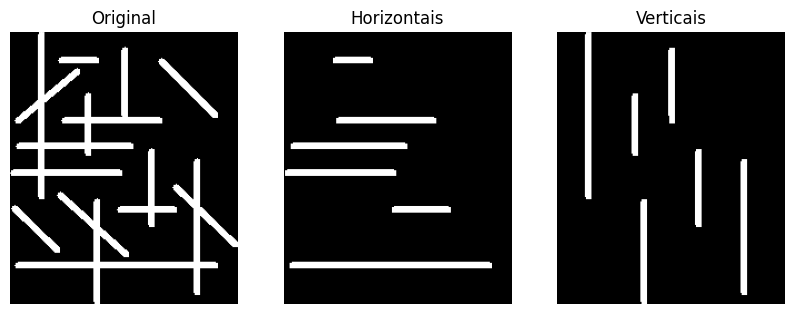

In [38]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

mask_horizontal = np.ones((3,15))
mask_vertical = np.ones((9,3))

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(opening(img2, mask_horizontal), cmap='gray', vmin=0, vmax=255)
plt.title("Horizontais")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(opening(img2, mask_vertical), cmap='gray', vmin=0, vmax=255)
plt.title("Verticais")
plt.axis("off")

plt.show()

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

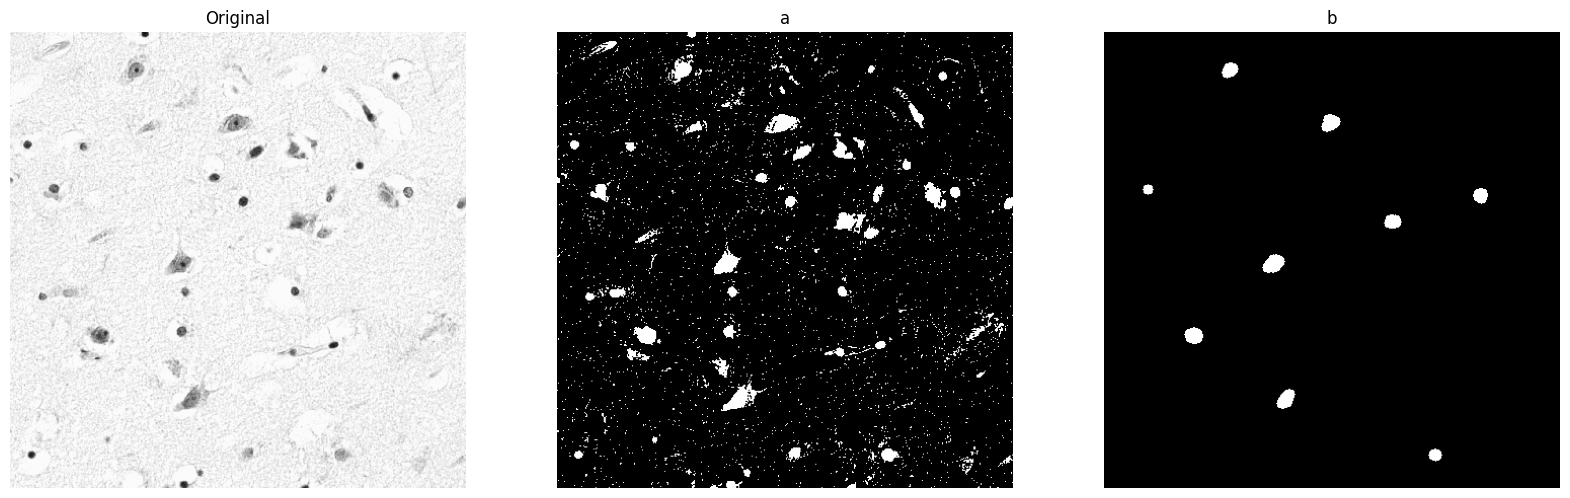

In [39]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

# a
img3_thresholded = np.where(img3 > 210, 0, 255)
plt.subplot(1,3,2)
plt.imshow(img3_thresholded, cmap='gray', vmin=0, vmax=255)
plt.title("a")
plt.axis("off")

# b
structuring_element = circle_maker(5)

plt.subplot(1,3,3)
plt.imshow(opening(img3_thresholded,structuring_element), cmap='gray', vmin=0, vmax=255)
plt.title("b")
plt.axis("off")

plt.show()

Não é possível obter somente pequenos objetos usando somente abertura, pois ela é um processo de remoção de ruídos ou de pequenos objetos entre grandes segmentos de uma imagem.

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

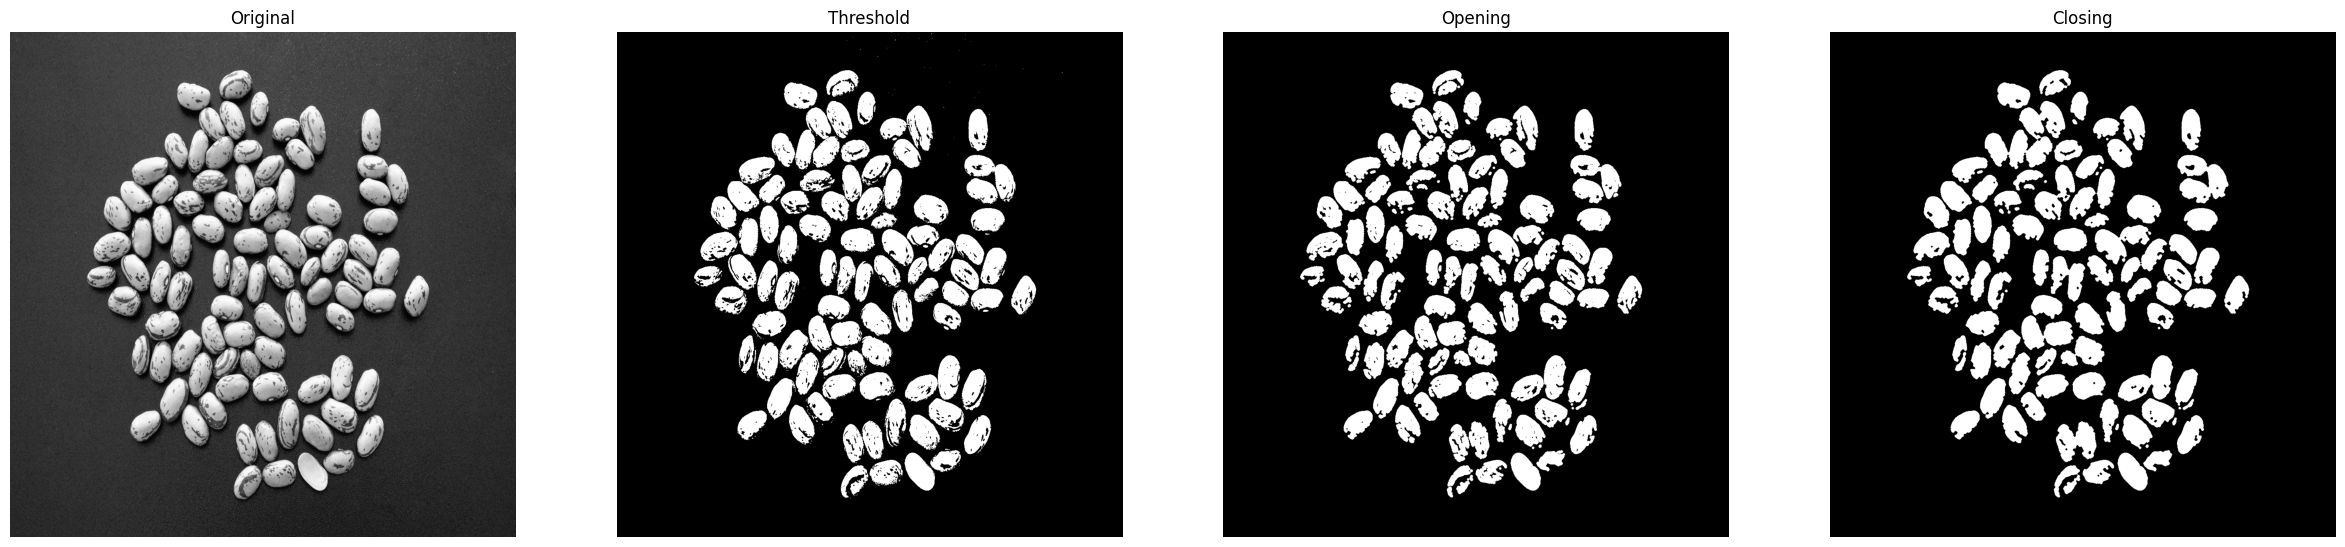

92!!


In [41]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)
img4 = cv2.resize(img4, (1200,1200))
plt.figure(figsize=(30,30))

plt.subplot(1,4,1)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

# Threshold para separar do fundo
img4_thresholded = np.where(img4 > 132, 255, 0)
plt.subplot(1,4,2)
plt.imshow(img4_thresholded, cmap='gray', vmin=0, vmax=255)
plt.title("Threshold")
plt.axis("off")

# Fechamento para ligar os feijoes as suas "manchas"
structuring_element = circle_maker(3)

opening_4 = opening(img4_thresholded,structuring_element)
plt.subplot(1,4,3)
plt.imshow(opening_4, cmap='gray', vmin=0, vmax=255)
plt.title("Opening")
plt.axis("off")

structuring_element = circle_maker(2)
closing_4 = closing(opening_4, structuring_element)
plt.subplot(1,4,4)
plt.imshow(closing_4, cmap='gray', vmin=0, vmax=255)
plt.title("Closing")
plt.axis("off")


plt.show()

# Pego do Lab03
width = closing_4.shape[0]
height = closing_4.shape[1]

visited = np.zeros((width, height), dtype=bool)

def search_neighbours(i, j):
    stack = [(i, j)]
    connected_pixels = []
    while stack:
        x, y = stack.pop()
        if visited[x, y] or np.all(closing_4[x, y] <= 5):
            continue
        visited[x, y] = True
        connected_pixels.append((x, y))
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (1, -1), (-1, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and not visited[nx, ny] and np.all(closing_4[nx, ny] > 5):
                stack.append((nx, ny))
    return connected_pixels

all_groups = []
for i in range(width):
    for j in range(height):
        if not visited[i, j] and np.all(closing_4[i, j] > 5):
            connected_group = search_neighbours(i, j)
            if connected_group:
                all_groups.append(connected_group)


print(f"{len(all_groups)}!!")

5.  Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

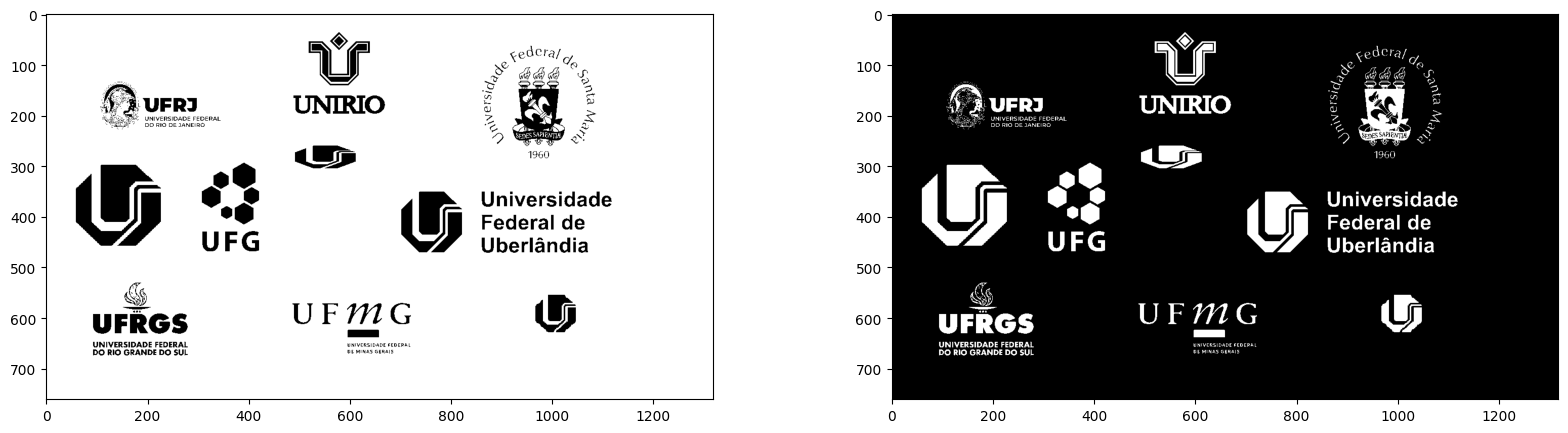

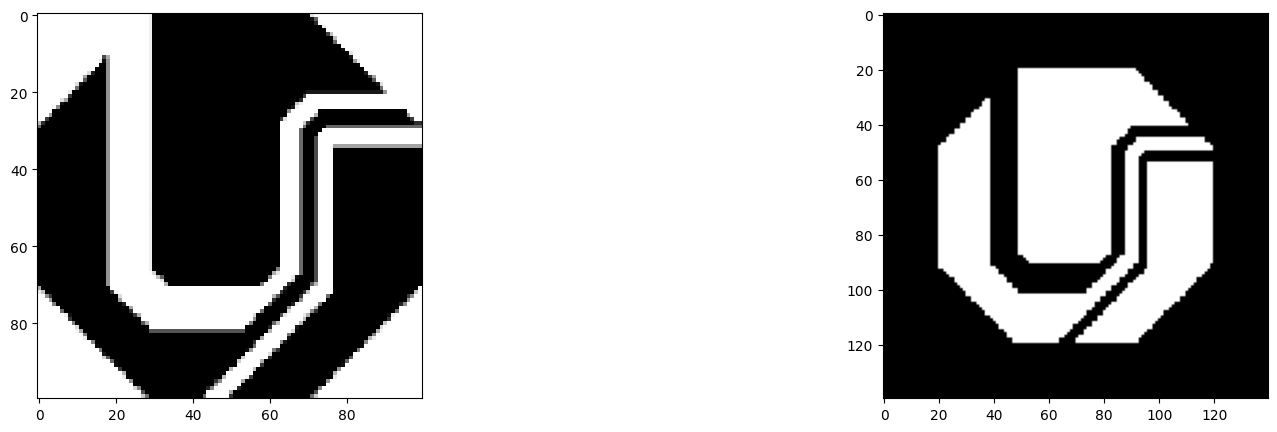

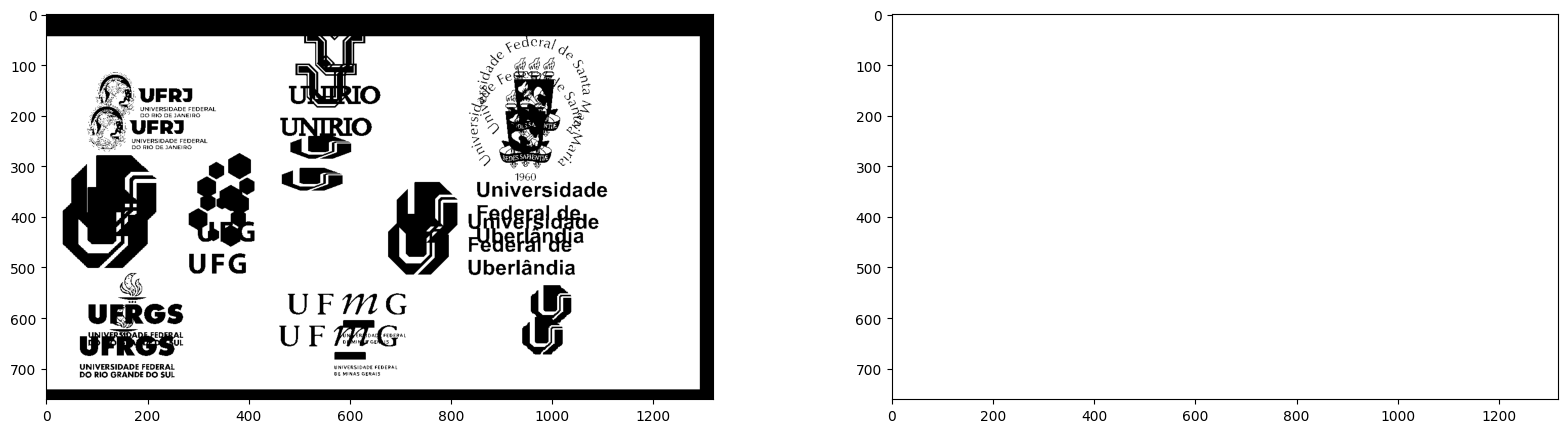

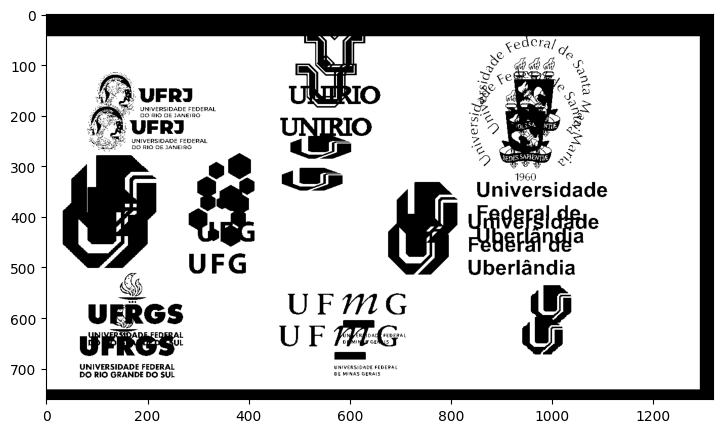

In [10]:
A = cv2.imread("logotipos.png", cv2.IMREAD_GRAYSCALE)
A = np.where(A > 132, 255, 0)
Ac = np.where(A == 255, 0, 255)
Y = cv2.imread("ufu.bmp", cv2.IMREAD_GRAYSCALE)
Y = cv2.resize(Y, (100,100))
bs = 20
Wy = np.where(Y == 255, 0, 255)
Wy = cv2.copyMakeBorder(Wy, bs, bs, bs, bs, cv2.BORDER_CONSTANT, value=0)

EAY = erosion(A,Y)
EAcWy = erosion(Ac,Wy)
new_img = np.zeros_like(A)
new_img[EAcWy==EAY]=255

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.imshow(A, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(Ac, cmap='gray', vmin=0, vmax=255)

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.imshow(Y, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(Wy, cmap='gray', vmin=0, vmax=255)

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.imshow(EAY, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(EAcWy, cmap='gray', vmin=0, vmax=255)

plt.figure(figsize=(20, 5))
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)

6. Utilize operadores morfológicos para extração de fronteiras dos feijões. Mostre o resultado junto com a imagem original

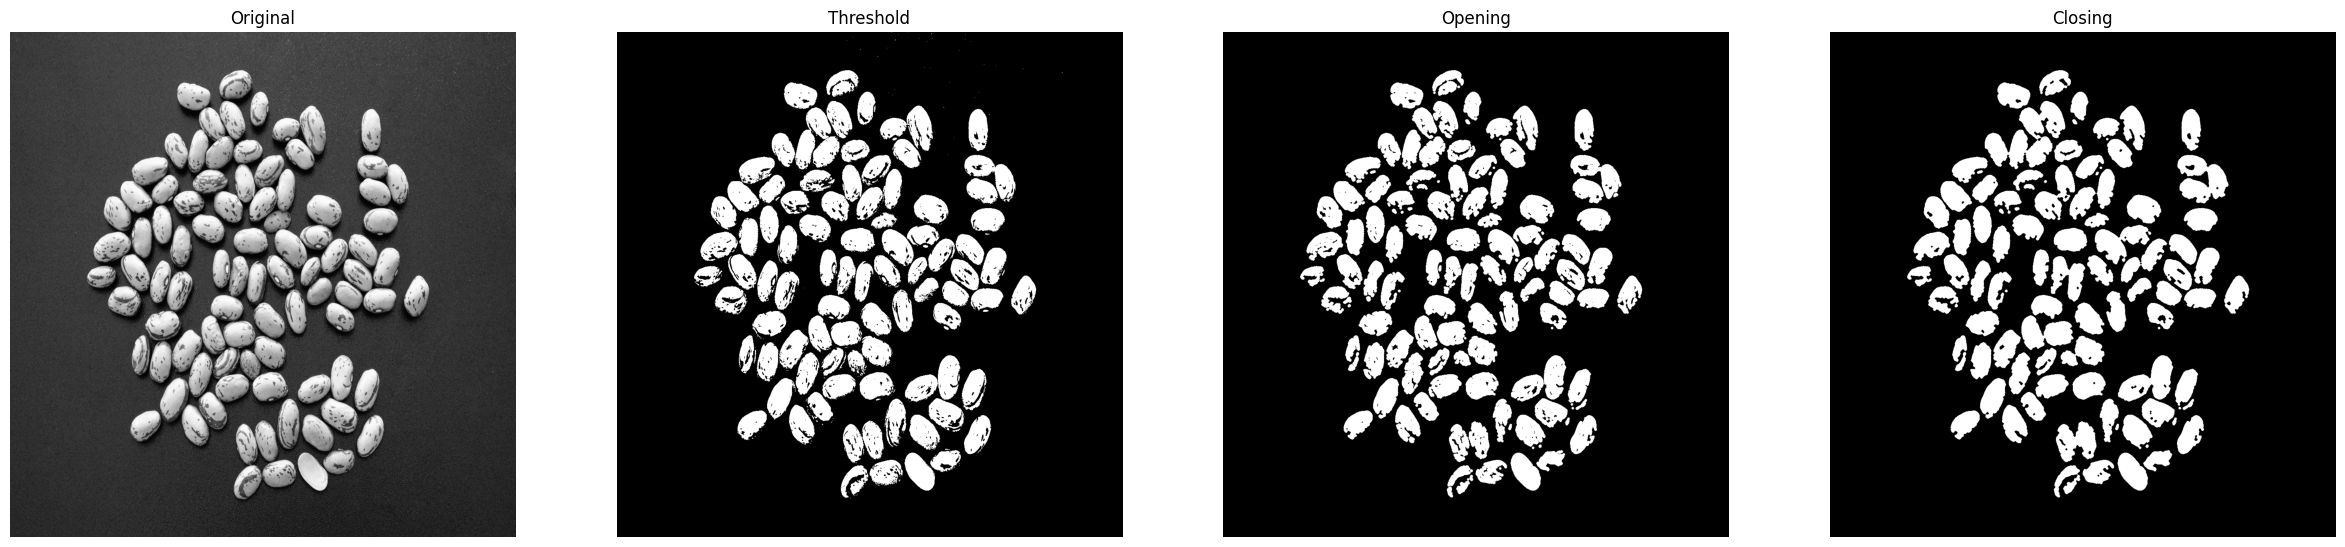

In [11]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)
img4 = cv2.resize(img4, (1200,1200))
plt.figure(figsize=(30,30))

plt.subplot(1,4,1)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis("off")

# Threshold para separar do fundo
img4_thresholded = np.where(img4 > 132, 255, 0)
plt.subplot(1,4,2)
plt.imshow(img4_thresholded, cmap='gray', vmin=0, vmax=255)
plt.title("Threshold")
plt.axis("off")

# Fechamento para ligar os feijoes as suas "manchas"
structuring_element = circle_maker(3)

opening_4 = opening(img4_thresholded,structuring_element)
plt.subplot(1,4,3)
plt.imshow(opening_4, cmap='gray', vmin=0, vmax=255)
plt.title("Opening")
plt.axis("off")

structuring_element = circle_maker(2)
closing_4 = closing(opening_4, structuring_element)
plt.subplot(1,4,4)
plt.imshow(closing_4, cmap='gray', vmin=0, vmax=255)
plt.title("Closing")
plt.axis("off")


plt.show()